
<a href="https://colab.research.google.com/github/takzen/ai-engineering-handbook/blob/main/notebooks/048_tSNE_vs_PCA_Dimensionality_Reduction.ipynb" target="_parent">
    <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>



<a href="https://colab.research.google.com/github/takzen/ai-engineering-handbook/blob/main/48_tSNE_vs_PCA_Dimensionality_Reduction.ipynb" target="_parent">
    <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


# 🗺️ t-SNE vs PCA: Jak narysować 64 wymiary?

Mamy zbiór danych **Digits** (Cyfry). Każda cyfra to obrazek 8x8 pikseli.
To daje **64 wymiary** ($8 \times 8 = 64$).
Chcemy to narysować na ekranie (2D).

1.  **PCA (Linear):** Rzutuje cień.
    *   *Problem:* Jeśli cyfry są do siebie podobne w skomplikowany sposób, PCA nałoży je na siebie.
2.  **t-SNE (Non-linear):** Liczy prawdopodobieństwo sąsiedztwa.
    *   *Zasada:* "Jeśli A i B są blisko w 64D, to mają być blisko w 2D. Jeśli są daleko, odsuń je jak najdalej".
    *   *Efekt:* Tworzy wyraźne "Wyspy" (Klastry).

Użyjemy t-SNE do wizualizacji, jak bardzo różnią się od siebie cyfry 0, 1, 2...

Kształt danych: (1797, 64)
Każdy wiersz to spłaszczony obrazek 8x8.


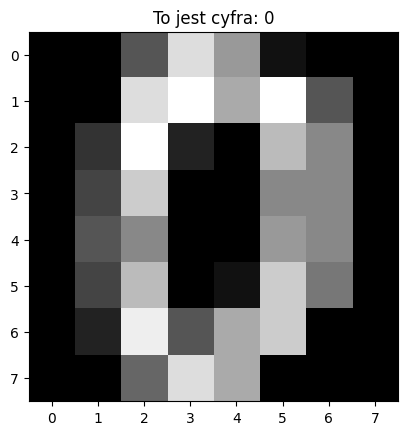

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# 1. DANE (Digits - prostsza wersja MNIST)
digits = load_digits()
X = digits.data   # 64 wymiary (piksele)
y = digits.target # Etykieta (0-9)

print(f"Kształt danych: {X.shape}")
print("Każdy wiersz to spłaszczony obrazek 8x8.")

# Zobaczmy przykładową cyfrę
plt.imshow(X[0].reshape(8, 8), cmap='gray')
plt.title(f"To jest cyfra: {y[0]}")
plt.show()

## Runda 1: PCA (Stara szkoła)

Zredukujmy 64 wymiary do 2 za pomocą PCA.
Zobaczymy, czy cyfry się odseparują, czy zleją w jedną plamę.

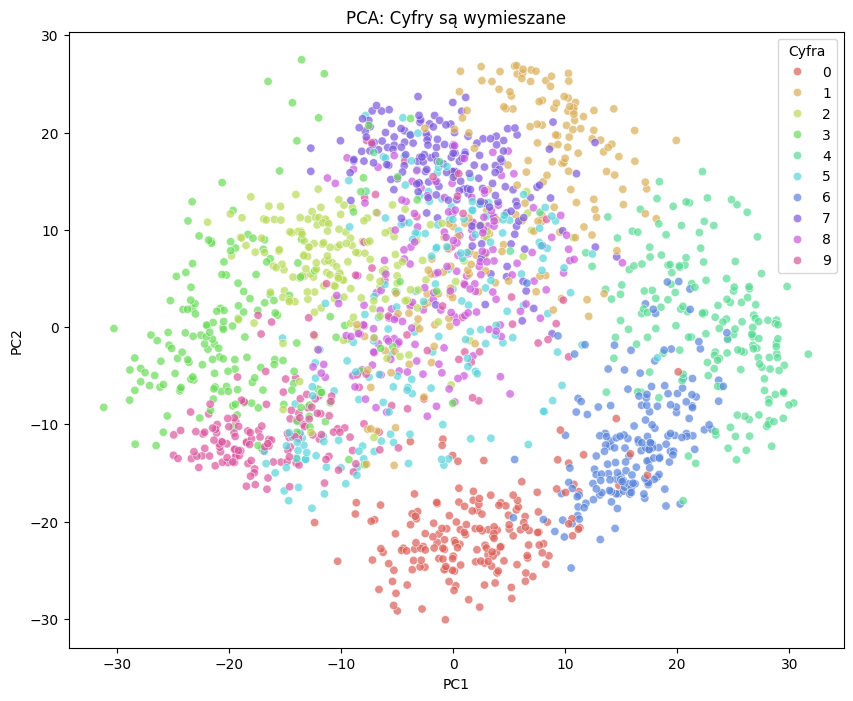

In [2]:
# PCA na 2 wymiary
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Tworzymy DataFrame do wykresu
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['Cyfra'] = y

# Wykres
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='PC1', y='PC2',
    hue='Cyfra',
    palette=sns.color_palette("hls", 10),
    data=df_pca,
    legend="full",
    alpha=0.7
)
plt.title("PCA: Cyfry są wymieszane")
plt.show()

## Runda 2: t-SNE (Nowoczesna wizualizacja)

Teraz użyjemy t-SNE.
Kluczowy parametr: **Perplexity**.
Określa on, na ilu sąsiadów patrzy każdy punkt. Zazwyczaj wartości 30-50 działają najlepiej.

*Uwaga: t-SNE jest wolniejsze niż PCA!*

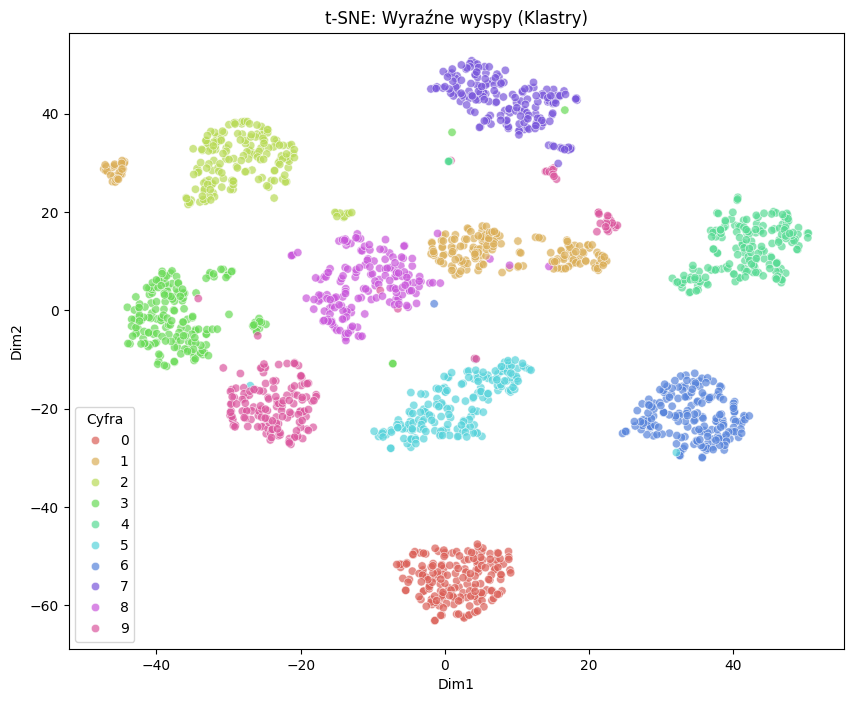

In [4]:
# t-SNE na 2 wymiary
# Usunąłem n_iter (domyślnie jest 1000, więc wyjdzie na to samo)
# init='pca' pomaga ustabilizować wynik
tsne = TSNE(n_components=2, perplexity=30, random_state=42, init='pca', learning_rate='auto')

# Uruchamiamy transformację
X_tsne = tsne.fit_transform(X)

# DataFrame
df_tsne = pd.DataFrame(data=X_tsne, columns=['Dim1', 'Dim2'])
df_tsne['Cyfra'] = y

# Wykres
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='Dim1', y='Dim2',
    hue='Cyfra',
    palette=sns.color_palette("hls", 10),
    data=df_tsne,
    legend="full",
    alpha=0.7
)
plt.title("t-SNE: Wyraźne wyspy (Klastry)")
plt.show()

## Analiza Porównawcza

Spójrz na oba wykresy.

1.  **PCA:**
    *   Wszystko jest zlane w centrum.
    *   Trudno odróżnić cyfrę 3 od 9.
    *   Struktura wygląda jak chmura.

2.  **t-SNE:**
    *   Widzisz wyraźne, oddzielne wysepki.
    *   Grupa "0" jest daleko od grupy "1".
    *   Nawet podobne cyfry (np. 3 i 9) tworzą osobne klastry.

To dowód na to, że w 64-wymiarowej przestrzeni te cyfry są matematycznie odseparowane, tylko PCA nie potrafiło tego pokazać na płasko.

## 🧠 Podsumowanie: Kiedy czego używać?

Dlaczego nie używamy t-SNE zawsze?

**Tu jest haczyk.**
1.  **Czas:** PCA liczy się w ułamku sekundy. t-SNE na dużych danych (np. milion wierszy) może trwać godzinami (chyba że użyjesz wersji CUDA/Rapids).
2.  **Nowe dane:** PCA buduje "wzór" (macierz transformacji). Możesz wziąć nowe zdjęcie i wrzucić je na stary wykres PCA.
    **t-SNE nie ma wzoru.** Uczy się układu tylko dla *konkretnych danych*. Nie możesz łatwo "dodać" nowego punktu do istniejącego wykresu t-SNE.

**Werdykt:**
*   Chcesz zmniejszyć wymiary, żeby wrzucić dane do modelu? -> **PCA**.
*   Chcesz zrobić ładny wykres do prezentacji i zrozumieć strukturę danych? -> **t-SNE** (lub nowszy **UMAP**).